In [1]:
from gensim.models import Word2Vec

import nltk
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

from utils import preprocess

from gensim import corpora, matutils, models, similarities
from gensim.similarities.docsim import MatrixSimilarity

unable to import 'smart_open.gcs', disabling that module


In [2]:
os.getcwd()
repo = '/home/yiyi/Documents/masterthesis/CPD'
data_dir = os.path.join(repo, 'data')
# Hilton miami downtown
# 2018-01-17T16:25:00+02:00
# 527 rooms
# 35 million renovation
# mammoth shopping complex, movie theater , 
# guest rooms, meeting space, restuarant, lobby, loading dock, park , 

file ='cleand_query_output_csv/fc73c5ad-3748-4d31-8ab2-014c875b05d7'

In [7]:
os.getcwd()

'/home/yiyi/Documents/masterarbeit/CPD/topic_modeling'

In [8]:
filepath ='/home/yiyi/Documents/masterarbeit/CPD/data/cleand_query_output_csv/fc73c5ad-3748-4d31-8ab2-014c875b05d7'

In [9]:
data = preprocess.get_data_list(filepath)

Elapsed time: 28.0275 seconds


In [28]:
len(data), data[:1]

(44839, [['stayed', 'one', 'suite', 'floor']])

In [6]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [26]:
model = Word2Vec(data, size=200, min_count=1)  # skipgram=1

In [27]:
def sent_vectorizer(sent, model):
    sent_vec = []
    numw = 0
    for w in sent:
        try:
            if numw==0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw += 1
        except:
            pass
    return np.asarray(sent_vec) / numw

In [29]:
X = []
for sentence in data:
    X.append(sent_vectorizer(sentence, model))

/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/home/yiyi/anaconda3/envs/cpd/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [30]:
np.asarray(X).shape

(44839, 200)

In [31]:
len(model.wv.vocab)

11734

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'WCSS')

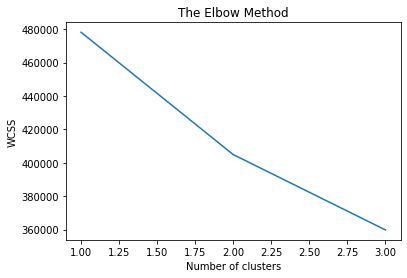

In [14]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(X )
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [34]:
labels = kmeans.fit_predict(X)

In [35]:
len(labels), len(X)

(44839, 44839)

In [36]:
centroids = kmeans.cluster_centers_

In [37]:
kmeans.score(X)

-188760.9700262924

In [38]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.20814282

In [39]:
for index, sentence in enumerate(data):
    if labels[index]==0:
        print(sentence )

['two', 'kid', 'two', 'adult']
['pool', 'really', 'fantastic', 'stress', 'enough', 'much', 'enjoyed']
['rubberized', 'bottom', 'stair', 'scuffed', 'knee', 'snagged', 'bathing', 'suit']
['hotel', 'close', 'family', 'attraction', 'wanted', 'see', 'sea', 'aquarium', 'jungle', 'island', 'daughter', 'loved', 'pool', 'much', 'could', 'wait', 'leave', 'attraction', 'go', 'swimming']
['also', 'porter', 'noticed', 'one', 'day', 'daughter', 'looked', 'little', 'getting', 'elevator', 'magic', 'trick', 'still', 'talking', 'family', 'hotel']
['overboked', 'friend', 'wait', 'come', 'back', 'later', 'get', 'room', 'reserved', 'week', 'ahead']
['person', 'checked', 'u', 'manager', 'messed', 'confirmation', 'number', 'check', 'second', 'day', 'trip', 'check', 'back', 'pay', 'fee']
['bar', 'tender', 'plum', 'rude', 'sexist', 'friend', 'sat', 'bar', 'minute', 'bar', 'tender', 'completely', 'ignored', 'u', 'continued', 'wait', 'male', 'customer']
['asked', 'man', 'next', 'get', 'drink', 'since', 'bar', 't